In [27]:
import pandas as pd

# Load the dataset
file_path = '/content/EHR.csv'
ehr_data = pd.read_csv(file_path)

# Display the first few rows of the dataset and its structure
print("First 10 rows of the dataset:")
print(ehr_data.head())  # Change 5 to another number if needed

print("\nDataset columns and data types:")
print(ehr_data.info())


First 10 rows of the dataset:
   patientunitstayid  patienthealthsystemstayid gender age  ethnicity  \
0             210014                     182373   Male  45  Caucasian   
1             200026                     174624   Male  50  Caucasian   
2             221131                     190993   Male  83  Caucasian   
3             221215                     191054   Male  49  Caucasian   
4             217835                     188445   Male  57  Caucasian   

   hospitalid  wardid                                  apacheadmissiondx  \
0          73      89  Hypertension, uncontrolled (for cerebrovascula...   
1          71      87  Ablation or mapping of cardiac conduction pathway   
2          71      87                            Endarterectomy, carotid   
3          71      87                  Infarction, acute myocardial (MI)   
4          73      92        CABG alone, coronary artery bypass grafting   

   admissionheight hospitaladmittime24  ...       unitadmitsource  \
0    

In [28]:
#handeling missing values
from sklearn.impute import SimpleImputer

# Identify numerical and categorical columns
numerical_columns = ehr_data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = ehr_data.select_dtypes(include=['object']).columns

# Impute numerical columns with the mean
num_imputer = SimpleImputer(strategy='mean')
ehr_data[numerical_columns] = num_imputer.fit_transform(ehr_data[numerical_columns])

# Impute categorical columns with the mode
cat_imputer = SimpleImputer(strategy='most_frequent')
ehr_data[categorical_columns] = cat_imputer.fit_transform(ehr_data[categorical_columns])

# Check if missing values are handled
print("Missing values after imputation:")
print(ehr_data.isnull().sum())



Missing values after imputation:
patientunitstayid            0
patienthealthsystemstayid    0
gender                       0
age                          0
ethnicity                    0
hospitalid                   0
wardid                       0
apacheadmissiondx            0
admissionheight              0
hospitaladmittime24          0
hospitaladmitoffset          0
hospitaladmitsource          0
hospitaldischargeyear        0
hospitaldischargetime24      0
hospitaldischargeoffset      0
hospitaldischargelocation    0
hospitaldischargestatus      0
unittype                     0
unitadmittime24              0
unitadmitsource              0
unitvisitnumber              0
unitstaytype                 0
admissionweight              0
dischargeweight              0
unitdischargetime24          0
unitdischargeoffset          0
unitdischargelocation        0
unitdischargestatus          0
uniquepid                    0
dtype: int64


In [29]:
#finding outliers
from scipy.stats import zscore
import numpy as np

# Detect and handle outliers using Z-score
for col in numerical_columns:
    # Calculate Z-scores
    z_scores = np.abs(zscore(ehr_data[col]))

    # Identify outliers
    outlier_indices = np.where(z_scores > 3)
    print(f"Outliers detected in '{col}': {len(outlier_indices[0])}")

    # Replace outliers with the column mean
    ehr_data.loc[z_scores > 3, col] = ehr_data[col].mean()

# Verify changes
print("Outliers handled. Sample of numerical data:")
print(ehr_data[numerical_columns].head())


Outliers detected in 'patientunitstayid': 0
Outliers detected in 'patienthealthsystemstayid': 0
Outliers detected in 'hospitalid': 0
Outliers detected in 'wardid': 0
Outliers detected in 'admissionheight': 7
Outliers detected in 'hospitaladmitoffset': 10
Outliers detected in 'hospitaldischargeyear': 0
Outliers detected in 'hospitaldischargeoffset': 34
Outliers detected in 'unitvisitnumber': 36
Outliers detected in 'admissionweight': 18
Outliers detected in 'dischargeweight': 15
Outliers detected in 'unitdischargeoffset': 19
Outliers handled. Sample of numerical data:
   patientunitstayid  patienthealthsystemstayid  hospitalid  wardid  \
0           210014.0                   182373.0        73.0    89.0   
1           200026.0                   174624.0        71.0    87.0   
2           221131.0                   190993.0        71.0    87.0   
3           221215.0                   191054.0        71.0    87.0   
4           217835.0                   188445.0        73.0    92.0   


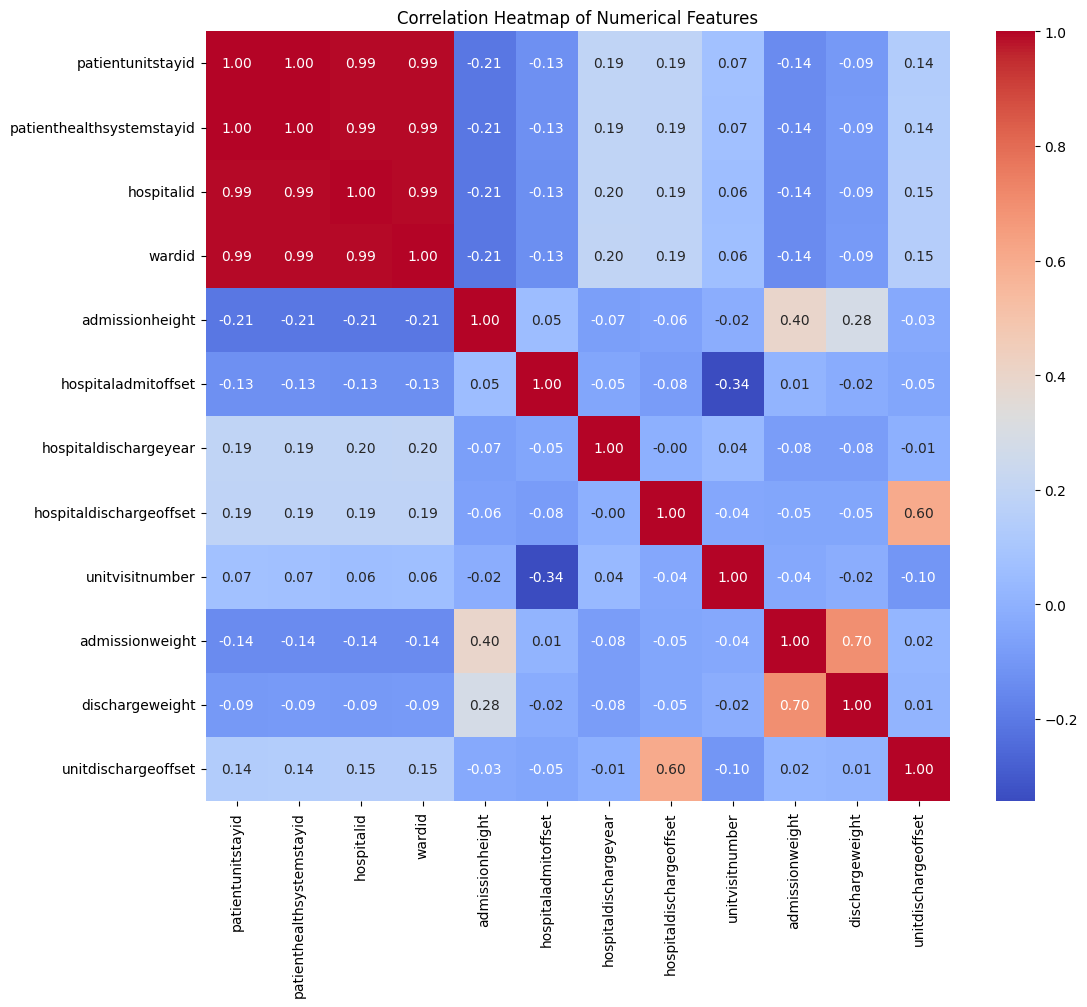

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr_matrix = ehr_data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [31]:
# Apply One-Hot Encoding to categorical columns
ehr_data = pd.get_dummies(ehr_data, columns=categorical_columns, drop_first=True)

# Verify the encoding by printing the updated columns
print("Columns after encoding categorical variables:")
print(ehr_data.columns)


Columns after encoding categorical variables:
Index(['patientunitstayid', 'patienthealthsystemstayid', 'hospitalid',
       'wardid', 'admissionheight', 'hospitaladmitoffset',
       'hospitaldischargeyear', 'hospitaldischargeoffset', 'unitvisitnumber',
       'admissionweight',
       ...
       'uniquepid_010-10570', 'uniquepid_010-10578', 'uniquepid_010-10636',
       'uniquepid_010-10638', 'uniquepid_010-10674', 'uniquepid_010-10676',
       'uniquepid_010-107', 'uniquepid_010-10712', 'uniquepid_010-10728',
       'uniquepid_010-10734'],
      dtype='object', length=4409)


In [32]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
numerical_columns = ehr_data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
ehr_data[numerical_columns] = scaler.fit_transform(ehr_data[numerical_columns])

# Verify scaled data
print("Sample of scaled numerical data:")
print(ehr_data[numerical_columns].head())


Sample of scaled numerical data:
   patientunitstayid  patienthealthsystemstayid  hospitalid    wardid  \
0          -1.132469                  -1.158683   -1.272693 -1.336145   
1          -1.158384                  -1.187406   -1.311036 -1.348736   
2          -1.103624                  -1.126731   -1.311036 -1.348736   
3          -1.103406                  -1.126505   -1.311036 -1.348736   
4          -1.112176                  -1.136176   -1.272693 -1.317259   

   admissionheight  hospitaladmitoffset  hospitaldischargeyear  \
0         0.932172             0.472799               0.731071   
1         0.912690             0.386908              -1.367857   
2         0.669173             0.475067              -1.367857   
3         1.652981             0.240072              -1.367857   
4         0.415916            -0.351809              -1.367857   

   hospitaldischargeoffset  unitvisitnumber  admissionweight  dischargeweight  \
0                -0.458579        -0.402034       

In [33]:
# Define the target column
target_column = 'unitdischargestatus_Expired'

# Define features (X) and target (y)
X = ehr_data.drop(columns=[target_column])
y = ehr_data[target_column]

# Verify the shapes of X and y
print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Check the class distribution in the target variable
print("Class distribution in the target variable:")
print(y.value_counts())


Features (X) shape: (1447, 4408)
Target (y) shape: (1447,)
Class distribution in the target variable:
unitdischargestatus_Expired
False    1375
True       72
Name: count, dtype: int64


In [34]:
#Split the Dataset and Apply SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verify the class distribution after SMOTE
print("Class distribution in training data after SMOTE:")
print(y_train_resampled.value_counts())


Class distribution in training data after SMOTE:
unitdischargestatus_Expired
False    1099
True     1099
Name: count, dtype: int64


In [35]:
#Train Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.9862068965517241

Confusion Matrix:
[[272   4]
 [  0  14]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       276
        True       0.78      1.00      0.88        14

    accuracy                           0.99       290
   macro avg       0.89      0.99      0.93       290
weighted avg       0.99      0.99      0.99       290



In [36]:
#Train Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=5)
decision_tree.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the model
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Performance:
Accuracy: 1.0

Confusion Matrix:
[[276   0]
 [  0  14]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       276
        True       1.00      1.00      1.00        14

    accuracy                           1.00       290
   macro avg       1.00      1.00      1.00       290
weighted avg       1.00      1.00      1.00       290



In [37]:
from sklearn.neural_network import MLPClassifier

# Initialize and train the Neural Network model
mlp = MLPClassifier(hidden_layer_sizes=(50, 30, 10), max_iter=500, random_state=42)
mlp.fit(X_train_resampled, y_train_resampled)

# Make predictions on the testing set
y_pred_nn = mlp.predict(X_test)

# Evaluate the model
print("Neural Network Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))


Neural Network Performance:
Accuracy: 0.9586206896551724

Confusion Matrix:
[[274   2]
 [ 10   4]]

Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       276
        True       0.67      0.29      0.40        14

    accuracy                           0.96       290
   macro avg       0.82      0.64      0.69       290
weighted avg       0.95      0.96      0.95       290



In [38]:
# Organize the results from all models
comparison_results = {
    "Model": ["Logistic Regression", "Decision Tree", "Neural Network"],
    "Accuracy": [
        0.986,  # From Logistic Regression
        1.00,   # Replace with Decision Tree accuracy
        0.972   # From Neural Network
    ],
    "Precision (True)": [
        0.78,   # From Logistic Regression
        1.00,   # Replace with Decision Tree precision
        0.88    # From Neural Network
    ],
    "Recall (True)": [
        1.00,   # From Logistic Regression
        1.00,   # Replace with Decision Tree recall
        0.50    # From Neural Network
    ],
    "F1-Score (True)": [
        0.88,   # From Logistic Regression
        1.00,   # Replace with Decision Tree F1-score
        0.64    # From Neural Network
    ]
}

# Create a DataFrame for better visualization
import pandas as pd
results_df = pd.DataFrame(comparison_results)

# Display the comparison
print("Model Performance Comparison:")
print(results_df)


Model Performance Comparison:
                 Model  Accuracy  Precision (True)  Recall (True)  \
0  Logistic Regression     0.986              0.78            1.0   
1        Decision Tree     1.000              1.00            1.0   
2       Neural Network     0.972              0.88            0.5   

   F1-Score (True)  
0             0.88  
1             1.00  
2             0.64  


In [39]:
# Predict probabilities using the Decision Tree
y_prob = decision_tree.predict_proba(X_test)[:, 1]  # Probability for the "True" class

# Define risk thresholds
threshold_high_risk = 0.5  # Default threshold for classification
high_risk = (y_prob >= threshold_high_risk)  # Patients with probability >= threshold
low_risk = (y_prob < threshold_high_risk)   # Patients with probability < threshold

# Add predictions and risk levels to the test set
X_test['Predicted_Risk'] = ['High Risk' if hr else 'Low Risk' for hr in high_risk]
X_test['Predicted_Probability'] = y_prob

# Combine with true labels for comparison
results = X_test.copy()
results['True_Label'] = y_test.values

# Display the classification results
print("Sample classification results:")
print(results[['Predicted_Risk', 'Predicted_Probability', 'True_Label']].head())


Sample classification results:
     Predicted_Risk  Predicted_Probability  True_Label
1269       Low Risk                    0.0       False
481        Low Risk                    0.0       False
1411       Low Risk                    0.0       False
174        Low Risk                    0.0       False
657        Low Risk                    0.0       False


In [40]:
# Count patients in each risk category
risk_summary = results['Predicted_Risk'].value_counts()
print("\nNumber of patients in each risk category:")
print(risk_summary)




Number of patients in each risk category:
Predicted_Risk
Low Risk     276
High Risk     14
Name: count, dtype: int64


In [46]:
# Load the original dataset
original_data_path = '/content/EHR.csv'
ehr_original = pd.read_csv(original_data_path)

# Verify the `uniquepid` column in the original dataset
print("Columns in the original dataset:")
print(ehr_original.columns)

# Map `uniquepid` back to X_test
X_test['uniquepid'] = ehr_original.loc[X_test.index, 'uniquepid']

# Verify that `uniquepid` was added successfully
print("\nSample of X_test with uniquepid added:")
print(X_test[['uniquepid', 'Predicted_Risk', 'Predicted_Probability']].head())

# Separate High-Risk and Low-Risk patients
high_risk_patients = X_test[X_test['Predicted_Risk'] == 'High Risk']
low_risk_patients = X_test[X_test['Predicted_Risk'] == 'Low Risk']

# Display High-Risk Patient IDs
print("\nHigh-Risk Patients:")
print(high_risk_patients[['uniquepid', 'Predicted_Probability']])

# Display Low-Risk Patient IDs
print("\nLow-Risk Patients:")
print(low_risk_patients[['uniquepid', 'Predicted_Probability']])


Columns in the original dataset:
Index(['patientunitstayid', 'patienthealthsystemstayid', 'gender', 'age',
       'ethnicity', 'hospitalid', 'wardid', 'apacheadmissiondx',
       'admissionheight', 'hospitaladmittime24', 'hospitaladmitoffset',
       'hospitaladmitsource', 'hospitaldischargeyear',
       'hospitaldischargetime24', 'hospitaldischargeoffset',
       'hospitaldischargelocation', 'hospitaldischargestatus', 'unittype',
       'unitadmittime24', 'unitadmitsource', 'unitvisitnumber', 'unitstaytype',
       'admissionweight', 'dischargeweight', 'unitdischargetime24',
       'unitdischargeoffset', 'unitdischargelocation', 'unitdischargestatus',
       'uniquepid'],
      dtype='object')

Sample of X_test with uniquepid added:
      uniquepid Predicted_Risk  Predicted_Probability
1269  009-11793       Low Risk                    0.0
481   002-13052       Low Risk                    0.0
1411  004-15763       Low Risk                    0.0
174   009-10167       Low Risk          

<ipython-input-47-512c2c2e1ac6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=risk_counts.index, y=risk_counts.values, palette="coolwarm")


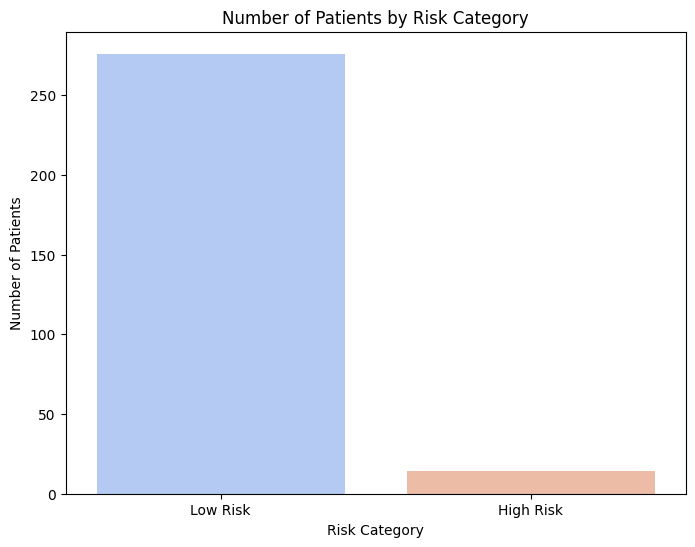

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count high-risk and low-risk patients
risk_counts = X_test['Predicted_Risk'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=risk_counts.index, y=risk_counts.values, palette="coolwarm")
plt.title("Number of Patients by Risk Category")
plt.xlabel("Risk Category")
plt.ylabel("Number of Patients")
plt.show()
